# Mapping syllables to notes in a melody

In [1]:
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, nussl
%matplotlib inline

import audio_utils

We're going to use a small sample of "Happy Birthday" for all our experiments.

Our goal is to map syllables on to onsets for the notes of "Happy Birthday".

In [2]:
hbd_signal, sr = librosa.load("audio/hbd_snip.wav")
print "hbd_signal sr is ", sr, "."
audio_utils.play_audio(hbd_signal, sr)

hbd_signal sr is  22050 .


In [3]:
hbd_speech, sr = librosa.load("audio/speech.wav")
print "hbd_speech sr is ", sr, "."
audio_utils.play_audio(hbd_speech, sr)

hbd_speech sr is  22050 .


Let's try and map the syllables of "Happy Birthday" to the correct notes.

First, let's try and detect onsets in the melody.

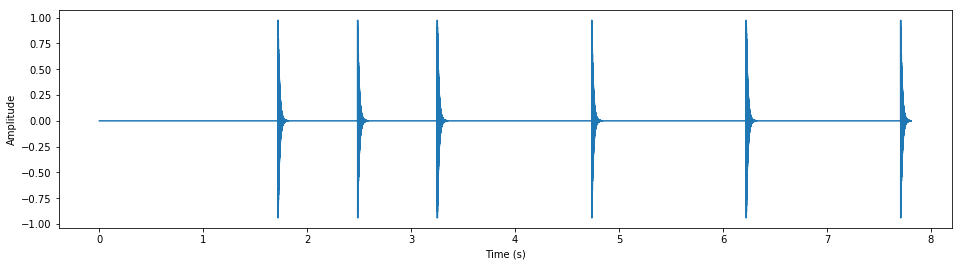

In [4]:
hbd_onset_frames = librosa.onset.onset_detect(y=hbd_signal, sr=sr)
hbd_onset_samples = librosa.frames_to_samples(hbd_onset_frames)
# print hbd_onset_samples
clicks = librosa.clicks(frames=hbd_onset_frames)
audio_utils.play_audio(clicks, 22050)
audio_utils.plot_audio(clicks, 22050)

Let's write a function, that takes in an array of onset frames and an array of signals and creates one big signal that plays the signals in the array -  at the onset times.

In [53]:
def create_timed_signal(onset_frames, signal_arr, signal_length):
    onset_samples = librosa.frames_to_samples(onset_frames)
    assert signal_length > onset_samples[-1] # basic check to ensure signal length is greater the last onset sample
    
    signal = np.zeros(signal_length)
    for i, sig in enumerate(signal_arr):
        start = onset_samples[i]
        end = start + sig.shape[0]
        signal[start:min(end, signal_length)] = sig[:min(end, signal_length) - start]
        
    return signal

(6, 4410)


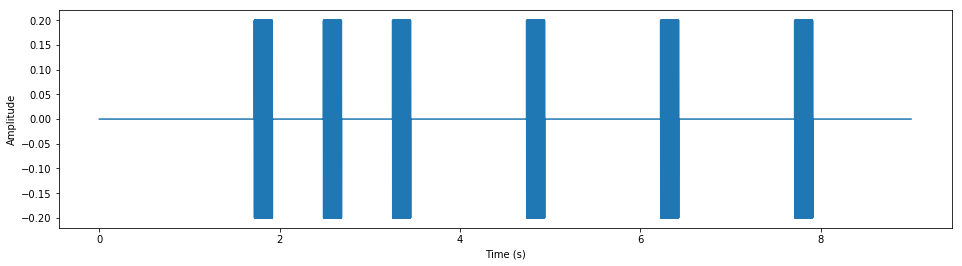

In [54]:
# freq = 440
# sr = 22050
# time = 3
# creating a basic sinewave
# x = audio_utils.make_sinewave(freq, time, sr)

freq = 440. # the frequency
length = 0.2 # length in seconds
sr = 22050. # the sampling rate (we'll talk about what this is soon...)
t = np.arange(0,length*sr)/sr
x = np.sin(2*np.pi*freq*t)

x *= 0.2 # reducing amplitude

# audio_utils.plot_audio(x, sr)
# audio_utils.play_audio(x, sr)

# creating an array of signals (ideally, segments) of the same note, just to test - 6 segments
segments = np.full((6,x.shape[0]), x)

print segments.shape

# creating the big signal that plays segments at the given onsets. any gaps between them are zero padded
big_signal = create_timed_signal(hbd_onset_frames, segments, hbd_signal.shape[0])

audio_utils.plot_audio(big_signal, sr)
audio_utils.play_audio(big_signal, sr)

Now, lets combine the signal of timed segments with the music of "Happy Birthday".

In [55]:
combined = hbd_signal + big_signal
audio_utils.play_audio(combined, sr)